I became interested in "attractors" after reading an article by Douglas Hofstadter on the subject. https://www.scientificamerican.com/article/metamagical-themas-1981-11/

Given a function, what happens when the return value is fed back into the function iteratively? What will emerge are points in the graph that are attractors.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

In [2]:
height = .72 # Because lambda is a keyword in Python
seed = 0.75;
period_limit = 2000;

In [3]:
def func_initial(x, height):
    return 4*(-height*x**2 + height*x); # cx^2 + cx^1 where c = 4*lambda, will return a parabola within the unit square and height of lambda

def func_1st_iterate(x, height):
    return func_initial(func_initial(x, height), height)

def func_2nd_iterate(x, height):
    return func_initial(func_initial(func_initial(x, height), height), height)

def func_3rd_iterate(x, height):
    return func_initial(func_initial(func_initial(func_initial(x, height), height), height), height)

In [4]:
def generate_paths(seed, height, func, period_limit):
    series = [seed];

    # x_star is the non-zero limit that a function will approach, depending on the initial lambda value
    x_star = None

    for i in range(0, period_limit):
        x = series[-1]
        y = func(x, height)
        if i < period_limit:
            series.append(y)
        if np.isclose(x, y, rtol=1e-04):
            # This will detect a cycle that approaches a single stable point, but no more than one.
            print("{0} and {1} are very similar after {2} iterations".format(x, y, i))
            x_star = x
            print("x* is roughly {0:.4f}".format(x_star))
            break
    
    return (series, x_star)

In [5]:
def draw_graph(series, x_star, height, func):
    x_limits = (0, 1)
    y_limits = (0, 1)

    x = np.linspace(0,1,1000)
    y = func(x, height)

    fig = plt.figure(figsize=(10,10))
    ax1 = plt.subplot(1,1,1)
    ax1.set_xlim(x_limits)
    ax1.set_ylim(y_limits)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')

    lambda_line, = ax1.plot([0, 1], [height, height], "--", label="lambda", lw=1)
    forty_five_degree_line, = ax1.plot([0, 1], [0, 1], "--", label="transpose fold", lw=1)
    func_line, = ax1.plot(x, y, label="f(x)")
    if x_star is not None:
        x_star_line, = ax1.plot([x_star, x_star], [0, func(x_star, height)], "-.", label="x*", lw=1)

    plt.legend()

    for i in range(0, len(series)-1):
        if i == 0:
            ax1.plot([series[i], series[i]], [0, series[i+1]], color='black', alpha=0.8, lw=0.6)
        else:
            ax1.plot([series[i], series[i]], [series[i], series[i+1]], color='black', alpha=0.8, lw=0.6)

        ax1.plot([series[i], series[i+1]], [series[i+1], series[i+1]], color='black', alpha=0.8, lw=0.6)

### Initial function

0.6527471723226563 and 0.6528047078806061 are very similar after 61 iterations
x* is roughly 0.6527


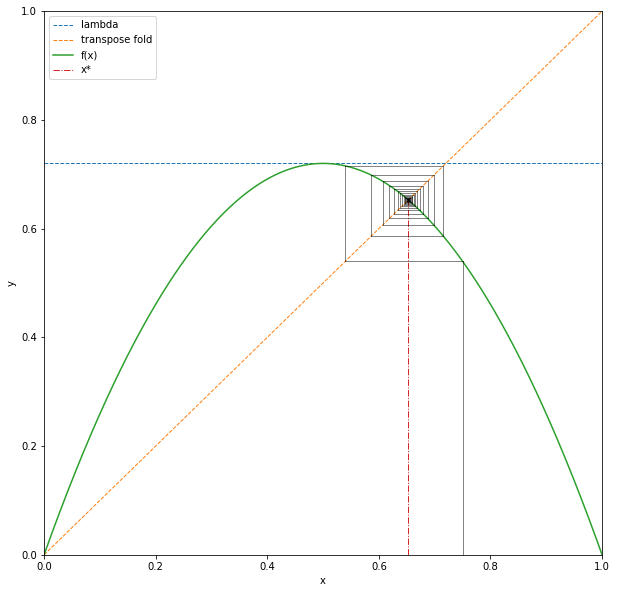

In [6]:
(series, x_star) = generate_paths(seed, height, func_initial, period_limit)
draw_graph(series, x_star, height, func_initial)

### First iterate

0.6530465401774928 and 0.6529859290647371 are very similar after 22 iterations
x* is roughly 0.6530


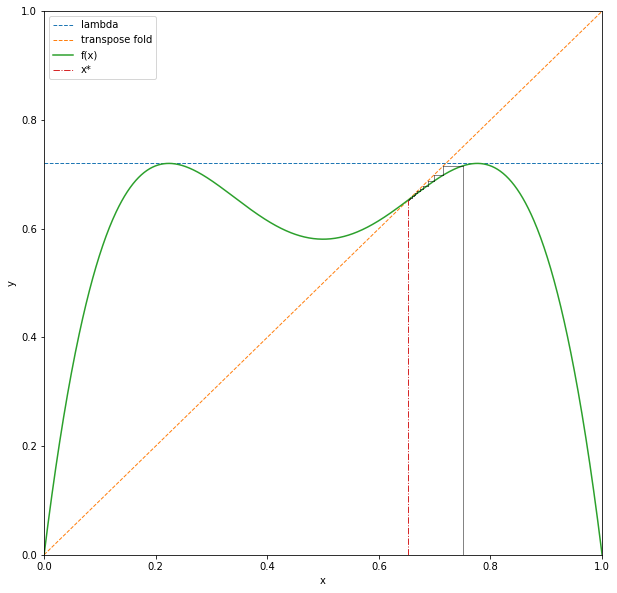

In [7]:
(series, x_star) = generate_paths(seed, height, func_1st_iterate, period_limit)
draw_graph(series, x_star, height, func_1st_iterate)

### Second iterate

0.652812552746348 and 0.6527540771986251 are very similar after 20 iterations
x* is roughly 0.6528


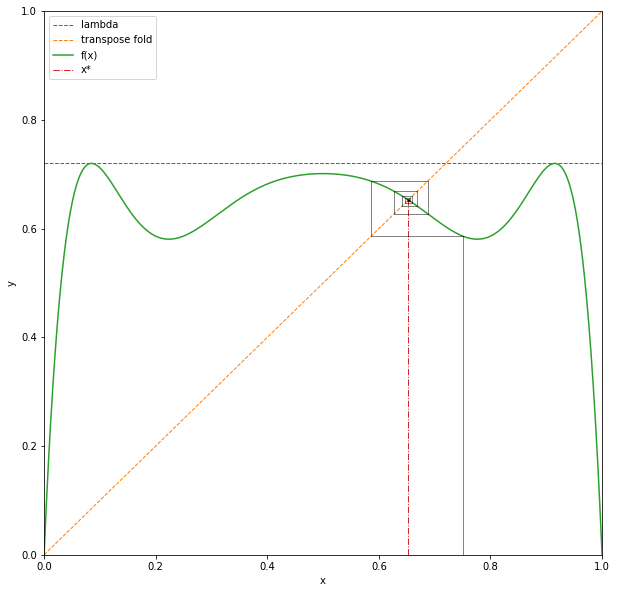

In [8]:
(series, x_star) = generate_paths(seed, height, func_2nd_iterate, period_limit)
draw_graph(series, x_star, height, func_2nd_iterate)

### Third iterate

0.652938983179641 and 0.65287446269416 are very similar after 12 iterations
x* is roughly 0.6529


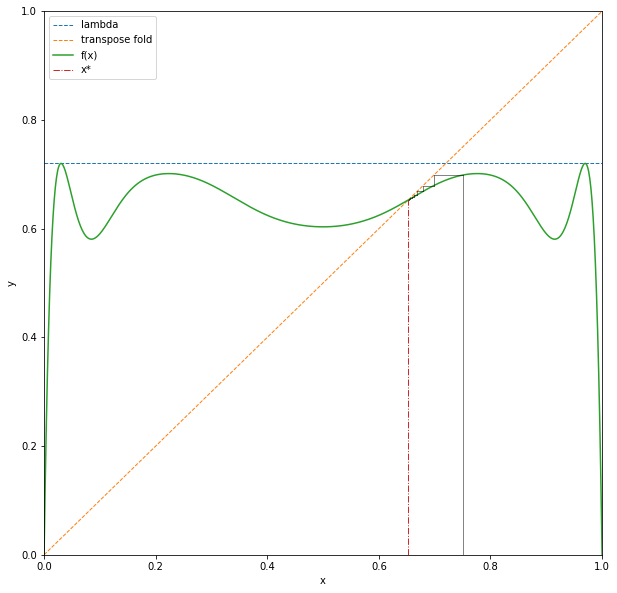

In [9]:
(series, x_star) = generate_paths(seed, height, func_3rd_iterate, period_limit)
draw_graph(series, x_star, height, func_3rd_iterate)